### 来建立一片森林
：树模型的优点是简单易懂，可视化之后的树人人都能够看懂，可惜随机森林是无法被可视化的。所以为了更加直观
地让大家体会随机森林的效果，我们来进行一个随机森林和单个决策树效益的对比。我们依然使用红酒数据集。


### 1. 导入我们需要的包


In [3]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine


### 2. 导入需要的数据集


In [4]:
wine = load_wine()
wine.data
wine.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
wine.data.shape

(178, 13)

### 3. 复习:sklearn建模的基本流程


In [6]:
#实例化
#训练集带入实例化后的模型去进行训练，使用的接口是fit
#使用其他的接口将测试集导入我们的模型，去获得我们希望获取的结果（score.Y_test）

from sklearn.model_selection import train_test_split
 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)


In [7]:
clf = DecisionTreeClassifier(random_state=0)#固定生成一棵树
rfc = RandomForestClassifier(random_state=0)#固定生成一片森林一旦限制了random_state
#那么森林中是固定的树。每一个树都不一样！！！！
#训练
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("Single Tree:{}".format(score_c)
      ,"Random Forest:{}".format(score_r)
     )


Single Tree:0.9259259259259259 Random Forest:1.0


### 4. 画出随机森林和决策树在一组交叉验证下的效果对比


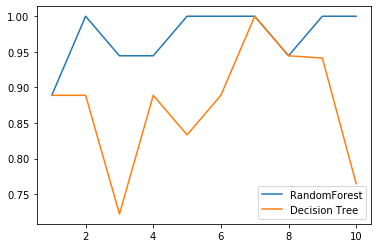

In [8]:
#目的是带大家复习一下交叉验证
#交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
 
    
    #交叉验证不用分训练和测试！
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)
 
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
 
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()


### 5. 画出随机森林和决策树在十组交叉验证下的效果对比


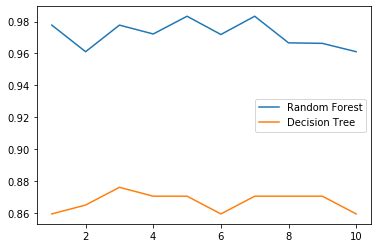

In [9]:
rfc_l = []
clf_l = []
 
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    #对10次交叉验证做平均---称为一组！一共10组。
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()


### 是否有注意到，单个决策树的波动轨迹和随机森林一致？
#再次验证了我们之前提到的，单个决策树的准确率越高，随机森林的准确率也会越高


### 6. n_estimators的学习曲线


In [10]:
#####【TIME WARNING: 2mins 30 seconds】#####
 
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

KeyboardInterrupt: 

In [ ]:
import numpy as np
from scipy.special import comb
 
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()


In [12]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)
 
#随机森林的重要属性之一：estimators，查看森林中树的状况
#rfc.estimators_:可以查看所有的决策树信息！一共20个，每一个树的不同在于random_state
#我们选第一个树[0]，查看。
rfc.estimators_[0].random_state
 

1872583848

In [11]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


### 袋装法

In [13]:
#无需划分训练集和测试集
 
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)
 
#重要属性oob_score_
rfc.oob_score_

0.9719101123595506

### 重要接口!!!!

In [22]:
#大家可以分别取尝试一下这些属性和接口
 
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)

In [23]:
rfc.score(Xtest,Ytest)#显示结果
 

0.9814814814814815

In [ ]:
rfc.feature_importances_#显示每个属性的重要性值

In [24]:
rfc.apply(Xtest)
rfc.predict(Xtest)#显示测试数据的预测标签

array([2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 0,
       1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1,
       0, 2, 1, 1, 2, 2, 1, 1, 1, 0])

In [14]:
rfc.predict_proba(Xtest)#一共三个标签，显示测试x中每一个值在三个标签中的概率。

array([[0.  , 0.  , 1.  ],
       [0.  , 0.04, 0.96],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.  , 0.04, 0.96],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.96, 0.04],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.88, 0.08],
       [0.  , 1.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.08, 0.12, 0.8 ],
       [1.  , 0.  , 0.  ],
       [0.08, 0.92, 0.  ],
       [0.04, 0.08, 0.88],
       [0.  , 0.88, 0.12],
       [0.  , 0.04, 0.96],
       [0.  , 0.08, 0.92],
       [0.04, 0.96, 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.16, 0.84, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
 